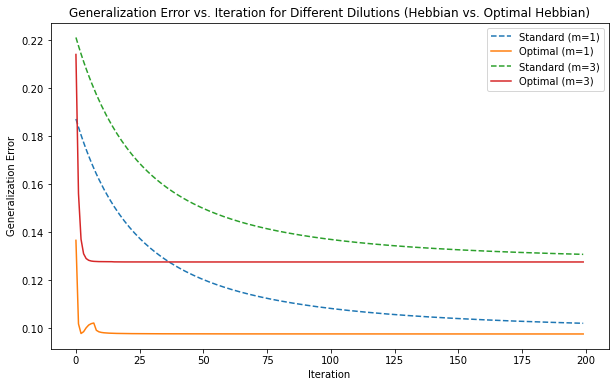

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb
np.random.seed(101) 
# Define constants
N = 10  # Number of data points
D = 3   # Dimensionality of input vectors
num_iterations = 200  # Number of training iterations
dilution_values = [1, 3]  # Dilution values to test
F = 0.01  # Learning rate for standard Hebbian learning

# Function to calculate the optimal learning rate (Fop) for a single data point
def calculate_optimal_learning_rate(phi, R, m):
    mu_values = np.linspace(-1, 1, m)
    num_term = np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(mu_values)])
    denom_term = np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(mu_values)]) - R*phi
    Fop = np.where(denom_term != 0, (np.sqrt(Q) / R) * (num_term / denom_term), 0)
    # Limit extreme values and apply regularization
    Fop = np.clip(Fop, -1e5, 1e5)
    return Fop

# Initialize lists to store generalization errors for different dilutions (standard and optimal)
generalization_errors_standard = []
generalization_errors_optimal = []

# Loop over different dilution values
for m in dilution_values:
    # Initialize teacher weight vector (B) with the current dilution
    B = np.zeros(D)
    non_zero_indices = np.random.choice(D, m, replace=False)
    B[non_zero_indices] = np.random.rand(m)
    B /= np.linalg.norm(B)  # Normalize B to have unit length

    # Generate synthetic data for input vectors (S)
    S = np.random.rand(N, D)  # N random data points
    S /= np.linalg.norm(S, axis=1)[:, np.newaxis]  # Normalize input vectors

    # Initialize student weight vector (J) for standard Hebbian learning
    J_standard = np.random.rand(D)
    J_standard /= np.linalg.norm(J_standard)  # Normalize J to have unit length

    # Initialize student weight vector (J) for optimal Hebbian learning
    J_optimal = np.random.rand(D)
    J_optimal /= np.linalg.norm(J_optimal)  # Normalize J to have unit length

    # Initialize lists to store generalization error and alignment field for standard Hebbian learning
    generalization_error_list_standard = []

    # Training loop for standard Hebbian learning
    for _ in range(num_iterations):
        # Calculate teacher's postsynaptic field (b)
        b = np.dot(B, S.T) / np.linalg.norm(B)

        # Calculate student's postsynaptic field (h_standard) for standard Hebbian learning
        h_standard = np.dot(J_standard, S.T) / np.linalg.norm(J_standard)

        # Calculate alignment field (phi_standard) for standard Hebbian learning
        phi_standard = np.sign(b) * h_standard

        # Update student weight vector (J_standard) with standard Hebbian learning
        J_standard += F * np.dot(phi_standard, S) / np.sqrt(N)

        # Calculate generalization error for standard Hebbian learning
        alignment_error_standard = np.abs(phi_standard.mean())
        generalization_error_standard = 1 - alignment_error_standard
        generalization_error_list_standard.append(generalization_error_standard)

    # Initialize lists to store generalization error and alignment field for optimal Hebbian learning
    generalization_error_list_optimal = []

    # Training loop for optimal Hebbian learning
    for _ in range(num_iterations):
        # Calculate teacher's postsynaptic field (b)
        b = np.dot(B, S.T) / np.linalg.norm(B)

        # Calculate student's postsynaptic field (h_optimal) for optimal Hebbian learning
        h_optimal = np.dot(J_optimal, S.T) / np.linalg.norm(J_optimal)

        # Calculate alignment field (phi_optimal) for optimal Hebbian learning
        phi_optimal = np.sign(b) * h_optimal

        # Calculate Q and R
        Q = np.dot(J_optimal, J_optimal) / N
        R = np.dot(B, J_optimal) / (np.linalg.norm(B) * np.linalg.norm(J_optimal))

        # Calculate optimal learning rate (Fop) for optimal Hebbian learning for each data point
        Fop = calculate_optimal_learning_rate(phi_optimal, R, m)

        # Update student weight vector (J_optimal) with optimal Hebbian learning
        weight_update_optimal = np.dot(Fop * phi_optimal, S) / np.sqrt(N)
        J_optimal += weight_update_optimal

        # Calculate generalization error for optimal Hebbian learning
        alignment_error_optimal = np.abs(phi_optimal.mean())
        generalization_error_optimal = 1 - alignment_error_optimal
        generalization_error_list_optimal.append(generalization_error_optimal)

    # Append the generalization errors for standard and optimal Hebbian learning to the lists
    generalization_errors_standard.append(generalization_error_list_standard)
    generalization_errors_optimal.append(generalization_error_list_optimal)

# Plot generalization errors for different dilutions (standard and optimal Hebbian learning)
plt.figure(figsize=(10, 6))
for i, m in enumerate(dilution_values):
    plt.plot(generalization_errors_standard[i], label=f'Standard (m={m})', linestyle='--')
    plt.plot(generalization_errors_optimal[i], label=f'Optimal (m={m})')
plt.xlabel('Iteration')
plt.ylabel('Generalization Error')
plt.title('Generalization Error vs. Iteration for Different Dilutions (Hebbian vs. Optimal Hebbian)')
plt.legend()
plt.show()


Iteration 0: Generalization Error = 0.4892
Iteration 1: Generalization Error = 0.3462
Iteration 2: Generalization Error = 0.2444
Iteration 3: Generalization Error = 0.1746
Iteration 4: Generalization Error = 0.1278
Iteration 5: Generalization Error = 0.0966
Iteration 6: Generalization Error = 0.0761
Iteration 7: Generalization Error = 0.0626
Iteration 8: Generalization Error = 0.0538
Iteration 9: Generalization Error = 0.0479
Iteration 10: Generalization Error = 0.0440
Iteration 11: Generalization Error = 0.0414
Iteration 12: Generalization Error = 0.0397
Iteration 13: Generalization Error = 0.0385
Iteration 14: Generalization Error = 0.0378
Iteration 15: Generalization Error = 0.0372
Iteration 16: Generalization Error = 0.0369
Iteration 17: Generalization Error = 0.0366
Iteration 18: Generalization Error = 0.0365
Iteration 19: Generalization Error = 0.0364
Iteration 20: Generalization Error = 0.0363
Iteration 21: Generalization Error = 0.0363
Iteration 22: Generalization Error = 0.036

Iteration 191: Generalization Error = 0.0361
Iteration 192: Generalization Error = 0.0361
Iteration 193: Generalization Error = 0.0361
Iteration 194: Generalization Error = 0.0361
Iteration 195: Generalization Error = 0.0361
Iteration 196: Generalization Error = 0.0361
Iteration 197: Generalization Error = 0.0361
Iteration 198: Generalization Error = 0.0361
Iteration 199: Generalization Error = 0.0361
Iteration 200: Generalization Error = 0.0361
Iteration 201: Generalization Error = 0.0361
Iteration 202: Generalization Error = 0.0361
Iteration 203: Generalization Error = 0.0361
Iteration 204: Generalization Error = 0.0361
Iteration 205: Generalization Error = 0.0361
Iteration 206: Generalization Error = 0.0361
Iteration 207: Generalization Error = 0.0361
Iteration 208: Generalization Error = 0.0361
Iteration 209: Generalization Error = 0.0361
Iteration 210: Generalization Error = 0.0361
Iteration 211: Generalization Error = 0.0361
Iteration 212: Generalization Error = 0.0361
Iteration 

Iteration 384: Generalization Error = 0.0361
Iteration 385: Generalization Error = 0.0361
Iteration 386: Generalization Error = 0.0361
Iteration 387: Generalization Error = 0.0361
Iteration 388: Generalization Error = 0.0361
Iteration 389: Generalization Error = 0.0361
Iteration 390: Generalization Error = 0.0361
Iteration 391: Generalization Error = 0.0361
Iteration 392: Generalization Error = 0.0361
Iteration 393: Generalization Error = 0.0361
Iteration 394: Generalization Error = 0.0361
Iteration 395: Generalization Error = 0.0361
Iteration 396: Generalization Error = 0.0361
Iteration 397: Generalization Error = 0.0361
Iteration 398: Generalization Error = 0.0361
Iteration 399: Generalization Error = 0.0361
Iteration 400: Generalization Error = 0.0361
Iteration 401: Generalization Error = 0.0361
Iteration 402: Generalization Error = 0.0361
Iteration 403: Generalization Error = 0.0361
Iteration 404: Generalization Error = 0.0361
Iteration 405: Generalization Error = 0.0361
Iteration 

Iteration 567: Generalization Error = 0.0361
Iteration 568: Generalization Error = 0.0361
Iteration 569: Generalization Error = 0.0361
Iteration 570: Generalization Error = 0.0361
Iteration 571: Generalization Error = 0.0361
Iteration 572: Generalization Error = 0.0361
Iteration 573: Generalization Error = 0.0361
Iteration 574: Generalization Error = 0.0361
Iteration 575: Generalization Error = 0.0361
Iteration 576: Generalization Error = 0.0361
Iteration 577: Generalization Error = 0.0361
Iteration 578: Generalization Error = 0.0361
Iteration 579: Generalization Error = 0.0361
Iteration 580: Generalization Error = 0.0361
Iteration 581: Generalization Error = 0.0361
Iteration 582: Generalization Error = 0.0361
Iteration 583: Generalization Error = 0.0361
Iteration 584: Generalization Error = 0.0361
Iteration 585: Generalization Error = 0.0361
Iteration 586: Generalization Error = 0.0361
Iteration 587: Generalization Error = 0.0361
Iteration 588: Generalization Error = 0.0361
Iteration 

Iteration 766: Generalization Error = 0.0361
Iteration 767: Generalization Error = 0.0361
Iteration 768: Generalization Error = 0.0361
Iteration 769: Generalization Error = 0.0361
Iteration 770: Generalization Error = 0.0361
Iteration 771: Generalization Error = 0.0361
Iteration 772: Generalization Error = 0.0361
Iteration 773: Generalization Error = 0.0361
Iteration 774: Generalization Error = 0.0361
Iteration 775: Generalization Error = 0.0361
Iteration 776: Generalization Error = 0.0361
Iteration 777: Generalization Error = 0.0361
Iteration 778: Generalization Error = 0.0361
Iteration 779: Generalization Error = 0.0361
Iteration 780: Generalization Error = 0.0361
Iteration 781: Generalization Error = 0.0361
Iteration 782: Generalization Error = 0.0361
Iteration 783: Generalization Error = 0.0361
Iteration 784: Generalization Error = 0.0361
Iteration 785: Generalization Error = 0.0361
Iteration 786: Generalization Error = 0.0361
Iteration 787: Generalization Error = 0.0361
Iteration 

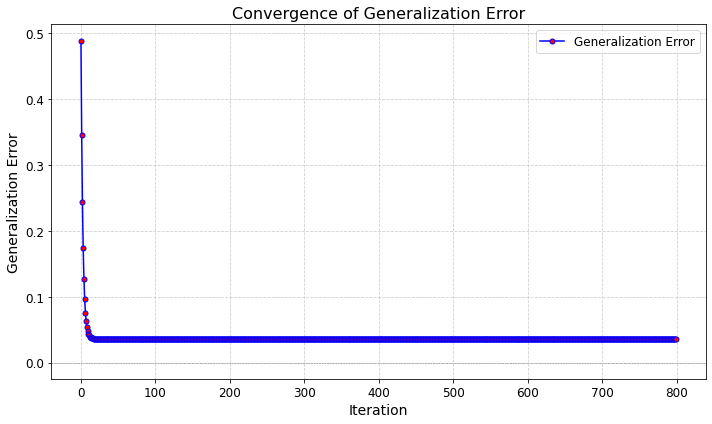

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb
np.random.seed(101) 
# Define constants
N = 3  # Number of data points
D = 3 # Dimensionality of input vectors
m = 3    # Dilution factor (number of non-zero components in B)
num_iterations = 800 # Number of training iterations

# Initialize teacher weight vector (B) with dilution
B = np.zeros(D)
non_zero_indices = np.random.choice(D, m, replace=False)
B[non_zero_indices] = np.random.rand(m)
B /= np.linalg.norm(B)  # Normalize B to have unit length

# Generate synthetic data for input vectors (S)
S = np.random.rand(N, D)  # N random data points
S /= np.linalg.norm(S, axis=1)[:, np.newaxis]  # Normalize input vectors

# Initialize student weight vector (J)
J = np.random.rand(D)
J /= np.linalg.norm(J)  # Normalize J to have unit length

# Initialize lists to store generalization error and alignment field
generalization_error_list = []

# Training loop
for iteration in range(num_iterations):
    # Initialize weight update for J
    weight_update = np.zeros(D)
    
    for i in range(N):
        # Calculate teacher's postsynaptic field (b)
        b = np.dot(B, S[i]) / np.linalg.norm(B)

        # Calculate student's postsynaptic field (h)
        h = np.dot(J, S[i]) / np.linalg.norm(J)

        # Calculate alignment field (φ)
        phi = np.sign(b) * h

        # Calculate Q and R
        Q = np.dot(J, J) / N
        R = np.dot(B, J) / (np.linalg.norm(B) * np.linalg.norm(J))

        # Calculate optimal learning rate (Fop)
        Fop = (np.sqrt(Q) / R) * (
            np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) /
            np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) - R*phi
        )

        # Update weight update for J
        weight_update += Fop * phi * S[i] / np.sqrt(N)

    # Update student weight vector (J) with the average weight update
    J += weight_update / N

    # Calculate generalization error
    alignment_error = np.abs(phi.mean())
    generalization_error = 1 - alignment_error
    generalization_error_list.append(generalization_error)

    # Print progress every 500 iterations
    if iteration % 1 == 0:
        print(f"Iteration {iteration}: Generalization Error = {generalization_error:.4f}")

# Plot generalization error
plt.figure(figsize=(10, 6))
plt.plot(generalization_error_list, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', label='Generalization Error')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Generalization Error', fontsize=14)
plt.title('Convergence of Generalization Error', fontsize=16)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal dashed line at y=0 for reference
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


Iteration 0: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0943
Iteration 100: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0779
Iteration 200: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777
Iteration 300: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777
Iteration 400: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777
Iteration 500: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777
Iteration 600: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777
Iteration 700: Generalization Error (Hebbian) = 0.0984, Generalization Error (Optimal) = 0.0777


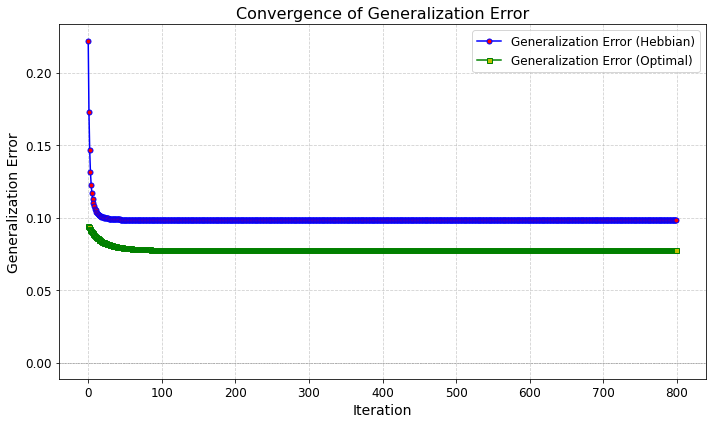

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb
np.random.seed(101)
# Define constants
N = 25  # Number of data points
D = 3  # Dimensionality of input vectors
m = 1   # Dilution factor (number of non-zero components in B)
num_iterations = 800  # Number of training iterations
F_hebbian = .1 # Learning rate for Hebbian learning
Fop = None  # Placeholder for optimal learning rate

# Initialize teacher weight vector (B) with dilution
B = np.zeros(D)
non_zero_indices = np.random.choice(D, m, replace=False)
B[non_zero_indices] = np.random.rand(m)
B /= np.linalg.norm(B)  # Normalize B to have unit length

# Generate synthetic data for input vectors (S)
S = np.random.rand(N, D)  # N random data points
S /= np.linalg.norm(S, axis=1)[:, np.newaxis]  # Normalize input vectors

# Initialize student weight vector (J) for Hebbian learning
J_hebbian = np.random.rand(D)
J_hebbian /= np.linalg.norm(J_hebbian)  # Normalize J to have unit length

# Initialize student weight vector (J) for optimal learning
J_optimal = np.random.rand(D)
J_optimal /= np.linalg.norm(J_optimal)  # Normalize J to have unit length

# Initialize lists to store generalization error
generalization_error_list_hebbian = []
generalization_error_list_optimal = []

# Training loop for Hebbian learning
for iteration in range(num_iterations):
    # Calculate teacher's postsynaptic field (b)
    b = np.dot(B, S.T) / np.linalg.norm(B)

    # Calculate student's postsynaptic field (h) for Hebbian learning
    h = np.dot(J_hebbian, S.T) / np.linalg.norm(J_hebbian)

    # Calculate alignment field (φ) for Hebbian learning
    phi = np.sign(b) * h

    # Update student weight vector (J) for Hebbian learning
    J_hebbian += F_hebbian * np.dot(phi, S) / np.sqrt(N)

    # Calculate generalization error for Hebbian learning
    alignment_error_hebbian = np.abs(phi.mean())
    generalization_error_hebbian = 1 - alignment_error_hebbian
    generalization_error_list_hebbian.append(generalization_error_hebbian)

# Training loop for optimal learning
for iteration in range(num_iterations):
    # Initialize weight update for J
    weight_update = np.zeros(D)
    
    for i in range(N):
        # Calculate teacher's postsynaptic field (b)
        b = np.dot(B, S[i]) / np.linalg.norm(B)

        # Calculate student's postsynaptic field (h)
        h = np.dot(J_optimal, S[i]) / np.linalg.norm(J_optimal)

        # Calculate alignment field (φ)
        phi = np.sign(b) * h

        # Calculate Q and R
        Q = np.dot(J_optimal, J_optimal) / N
        R = np.dot(B, J_optimal) / (np.linalg.norm(B) * np.linalg.norm(J_optimal))

        # Calculate optimal learning rate (Fop)
        Fop = (np.sqrt(Q) / R) * (
            np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) /
            np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) - R*phi
        )

        # Update weight update for J
        weight_update += Fop * phi * S[i] / np.sqrt(N)

    # Update student weight vector (J) with the average weight update
    J_optimal += weight_update / N

    # Calculate generalization error for optimal learning
    alignment_error_optimal = np.abs(phi.mean())
    generalization_error_optimal = 1 - alignment_error_optimal
    generalization_error_list_optimal.append(generalization_error_optimal)

    # Print progress every 50 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Generalization Error (Hebbian) = {generalization_error_hebbian:.4f}, Generalization Error (Optimal) = {generalization_error_optimal:.4f}")

# Plot generalization error for both Hebbian and optimal learning
plt.figure(figsize=(10, 6))
plt.plot(generalization_error_list_hebbian, label='Generalization Error (Hebbian)', color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r')
plt.plot(generalization_error_list_optimal, label='Generalization Error (Optimal)', color='g', linestyle='-', marker='s', markersize=5, markerfacecolor='y')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Generalization Error', fontsize=14)
plt.title('Convergence of Generalization Error', fontsize=16)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal dashed line at y=0 for reference
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


Iteration 0: Generalization Error for m=1 = 0.4870
Iteration 50: Generalization Error for m=1 = 0.3603
Iteration 100: Generalization Error for m=1 = 0.3063
Iteration 150: Generalization Error for m=1 = 0.2810
Iteration 200: Generalization Error for m=1 = 0.2686
Iteration 250: Generalization Error for m=1 = 0.2623
Iteration 300: Generalization Error for m=1 = 0.2590
Iteration 350: Generalization Error for m=1 = 0.2574
Iteration 400: Generalization Error for m=1 = 0.2565
Iteration 450: Generalization Error for m=1 = 0.2561
Iteration 500: Generalization Error for m=1 = 0.2558
Iteration 550: Generalization Error for m=1 = 0.2557
Iteration 600: Generalization Error for m=1 = 0.2556
Iteration 650: Generalization Error for m=1 = 0.2556
Iteration 700: Generalization Error for m=1 = 0.2556
Iteration 750: Generalization Error for m=1 = 0.2556
Iteration 0: Generalization Error for m=3 = 0.0743
Iteration 50: Generalization Error for m=3 = 0.0665
Iteration 100: Generalization Error for m=3 = 0.0605

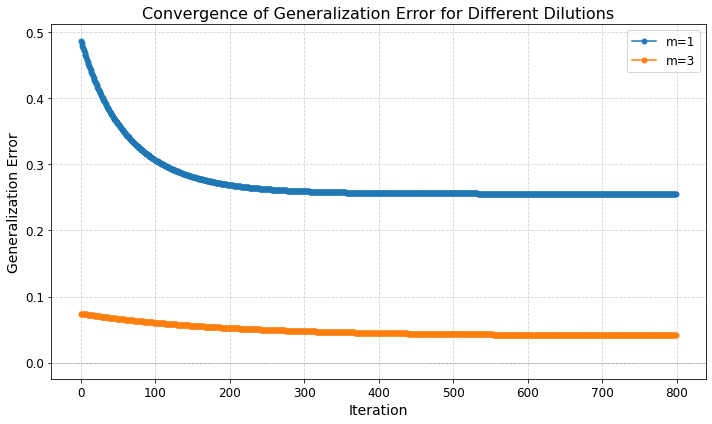

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb
np.random.seed(101)
# Define constants
N = 50  # Number of data points
D = 3   # Dimensionality of input vectors
num_iterations = 800  # Number of training iterations
dilution_values = [1, 3]  # Dilution values to test

# Initialize lists to store generalization errors for different dilutions
generalization_errors = []

# Loop over different dilution values
for m in dilution_values:
    # Initialize teacher weight vector (B) with the current dilution
    B = np.zeros(D)
    non_zero_indices = np.random.choice(D, m, replace=False)
    B[non_zero_indices] = np.random.rand(m)
    B /= np.linalg.norm(B)  # Normalize B to have unit length

    # Generate synthetic data for input vectors (S)
    S = np.random.rand(N, D)  # N random data points
    S /= np.linalg.norm(S, axis=1)[:, np.newaxis]  # Normalize input vectors

    # Initialize student weight vector (J)
    J = np.random.rand(D)
    J /= np.linalg.norm(J)  # Normalize J to have unit length

    # Initialize list to store generalization error for the current dilution
    generalization_error_list = []

    # Training loop
    for iteration in range(num_iterations):
        # Initialize weight update for J
        weight_update = np.zeros(D)

        for i in range(N):
            # Calculate teacher's postsynaptic field (b)
            b = np.dot(B, S[i]) / np.linalg.norm(B)

            # Calculate student's postsynaptic field (h)
            h = np.dot(J, S[i]) / np.linalg.norm(J)

            # Calculate alignment field (φ)
            phi = np.sign(b) * h

            # Calculate Q and R
            Q = np.dot(J, J) / N
            R = np.dot(B, J) / (np.linalg.norm(B) * np.linalg.norm(J))

            # Calculate optimal learning rate (Fop)
            Fop = (np.sqrt(Q) / R) * (
                np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) /
                np.sum([comb(m, (m-1)//2-k) * norm.pdf(phi, loc=R*mu_k, scale=np.sqrt(1-R**2)) for k, mu_k in enumerate(np.linspace(-1, 1, m))]) - R*phi
            )

            # Update weight update for J
            weight_update += Fop * phi * S[i] / np.sqrt(N)

        # Update student weight vector (J) with the average weight update
        J += weight_update / N

        # Calculate generalization error
        alignment_error = np.abs(phi.mean())
        generalization_error = 1 - alignment_error
        generalization_error_list.append(generalization_error)

        # Print progress every 20 iterations
        if iteration % 50 == 0:
            print(f"Iteration {iteration}: Generalization Error for m={m} = {generalization_error:.4f}")

    # Append the generalization errors for the current dilution to the list
    generalization_errors.append(generalization_error_list)

# Plot generalization errors for different dilutions
plt.figure(figsize=(10, 6))
for i, m in enumerate(dilution_values):
    plt.plot(generalization_errors[i], label=f'm={m}', marker='o', markersize=5)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Generalization Error', fontsize=14)
plt.title('Convergence of Generalization Error for Different Dilutions', fontsize=16)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal dashed line at y=0 for reference
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


Generalization Error: 0.004


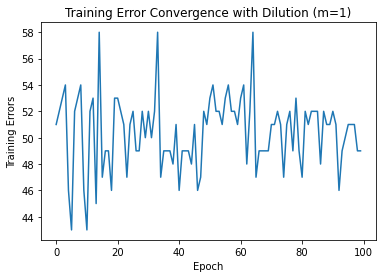